<a href="https://colab.research.google.com/github/AmitSingh-Rajjput/Time-Series-Notebook/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv')

In [ ]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
#convert month column into datetime 
dataset['Month']=pd.to_datetime(dataset['Month'])
# Set index of dataframe month column
indexedDataset=dataset.set_index(['Month'])

In [ ]:
indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0.5, 1.0, ' Passenger Vs Date')

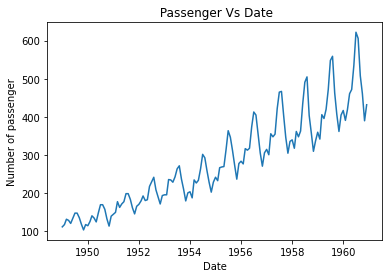

In [ ]:
#ploting the graph
plt.plot(indexedDataset)
plt.xlabel('Date')
plt.ylabel('Number of passenger')
plt.title(' Passenger Vs Date')


Here we can see that this data is not stationary because mean varies all the time.

This data is show upward trend.

Now we check data is stationary or not by using some test.

1:Rolling Statistics 
   
   2: Dicky-Fuller Test

In [ ]:
#Rolling Statistics
#Here rolling window 12 means that cummulative sum of one year and show its mean in last month row. Same as for std()
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


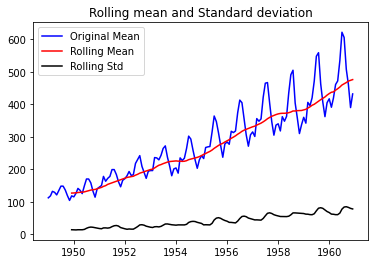

In [ ]:
#plot rolling statitics
plt.plot(indexedDataset,color='blue',label='Original Mean')
plt.plot(rolmean,color='red',label='Rolling Mean')
plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and Standard deviation')
plt.show()

**Here mean and std is not constant so we can say that this is not stationary.**

In [ ]:
# Now we do Dicky-Fuller test
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
adfuller_test(indexedDataset['#Passengers']) # Now we can say that it is not stationary data.

ADF Test Statistic : 0.8153688792060418
p-value : 0.9918802434376409
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


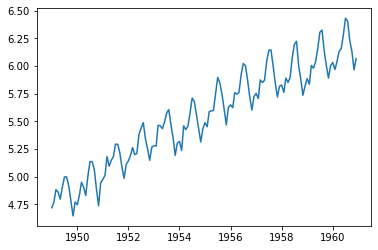

In [ ]:
#Estimate treand
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

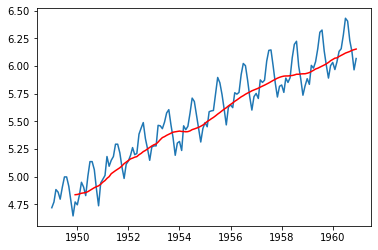

In [ ]:
movingAverage=indexedDataset_logScale.rolling(window=12).mean()
movingSTD=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [ ]:
datasetLogScaleMovingAverage=indexedDataset_logScale-movingAverage
datasetLogScaleMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
datasetLogScaleMovingAverage.dropna(inplace=True)
datasetLogScaleMovingAverage.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [ ]:
adfuller_test(datasetLogScaleMovingAverage['#Passengers'])

ADF Test Statistic : -3.1629079913008504
p-value : 0.022234630001244333
#Lags Used : 13
Number of Observations Used : 119
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


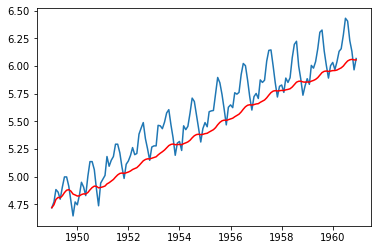

In [ ]:
# another Transformation
exponentialWeightedAverage=indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialWeightedAverage,color='red')

In [ ]:
datasetLog_ExponentialAverage=indexedDataset_logScale-exponentialWeightedAverage
adfuller_test(datasetLog_ExponentialAverage['#Passengers'])

ADF Test Statistic : -3.6012624201616865
p-value : 0.0057369388015117
#Lags Used : 13
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


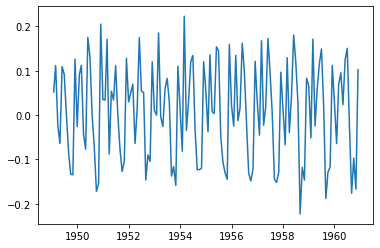

In [ ]:
#Now to creating the model
datasetLogDiffShift=indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShift)
#from here we can say that d=1 because we use one shift.

In [ ]:
datasetLogDiffShift.dropna(inplace=True)
adfuller_test(datasetLogDiffShift['#Passengers'])

ADF Test Statistic : -2.7171305983881044
p-value : 0.07112054815086355
#Lags Used : 14
Number of Observations Used : 128
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


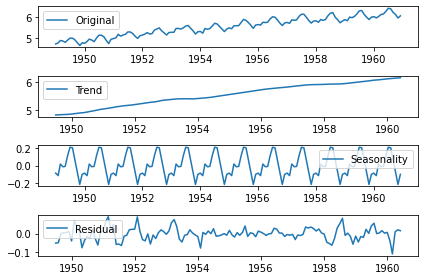

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexedDataset_logScale)
trend=decomposition.trend
sesonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(sesonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()

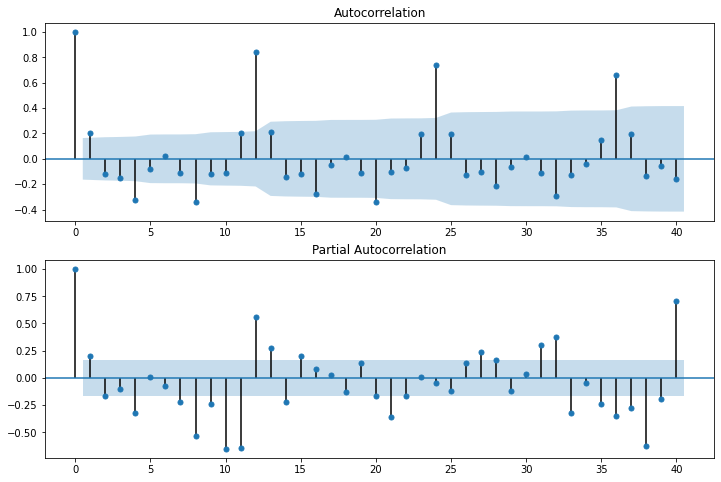

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datasetLogDiffShift['#Passengers'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datasetLogDiffShift['#Passengers'],lags=40,ax=ax2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS :0.05846069364959351')

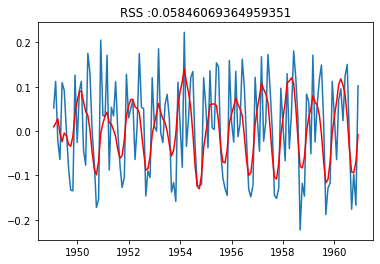

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(indexedDataset_logScale,order=(2,1,2))
result_ARIMA=model.fit()
plt.plot(datasetLogDiffShift)
plt.plot(result_ARIMA.fittedvalues,color='red')
plt.title('RSS :{}'.format(sum(result_ARIMA.fittedvalues-datasetLogDiffShift['#Passengers'])**2 ))

In [ ]:
predictions_ARIMA_diff=pd.Series(result_ARIMA.fittedvalues,copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64

In [ ]:
#convert into cummulative sum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [ ]:
prediction_ARIMA_log=pd.Series(indexedDataset_logScale['#Passengers'].iloc[0],index=indexedDataset_logScale.index)
prediction_ARIMA_log=prediction_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
prediction_ARIMA_log.head(12)

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
1949-06-01    4.744830
1949-07-01    4.740483
1949-08-01    4.729506
1949-09-01    4.699577
1949-10-01    4.665109
1949-11-01    4.653831
1949-12-01    4.691043
dtype: float64

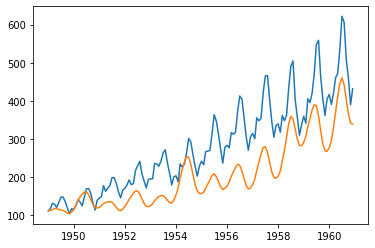

In [ ]:
prediction_ARIMA=np.exp(prediction_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(prediction_ARIMA)

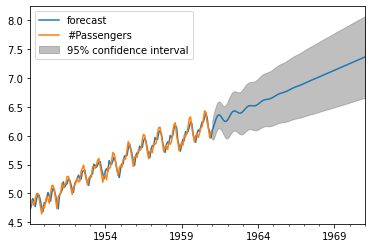

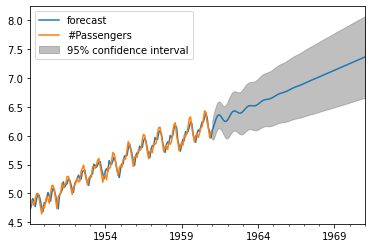

In [ ]:
# Prediction For next ten year 144 rows +120 (12*10)
result_ARIMA.plot_predict(1,264)

In [ ]:
result_ARIMA.forecast(steps=120)

(array([6.09553405, 6.15281422, 6.22442985, 6.29241113, 6.34164717,
        6.36359351, 6.35784666, 6.33139283, 6.29597523, 6.26447706,
        6.24738329, 6.25025185, 6.27275854, 6.30940329, 6.35151504,
        6.38988657, 6.41727373, 6.43011038, 6.42906671, 6.41842473,
        6.40456145, 6.39403614, 6.3918309 , 6.40019516, 6.41833707,
        6.44295419, 6.46937441, 6.49293984, 6.5102411 , 6.51989021,
        6.52267565, 6.52112377, 6.51864522, 6.51853691, 6.5231193 ,
        6.53322371, 6.5481288 , 6.56591565, 6.58410312, 6.60036538,
        6.6131326 , 6.62192772, 6.6273778 , 6.63093123, 6.63438687,
        6.63937988, 6.64696511, 6.65739849, 6.67015332, 6.68414256,
        6.69806628, 6.710779  , 6.72157728, 6.73033979, 6.73749806,
        6.74386376, 6.75037323, 6.75782596, 6.76668687, 6.77699829,
        6.78841325, 6.80032857, 6.81207196, 6.82308759, 6.83307134,
        6.8420249 , 6.85022311, 6.85811221, 6.86617342, 6.87479154,
        6.88416307, 6.89426389, 6.90487894, 6.91